Asif kamran
8789001269
asifkam30@gmail.com

# Fraud Transactions Detection

In [1]:
#importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing Dataset
df=pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

# Check Numeric and Categorical Features

In [5]:
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


# Check the missing data

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# EDA

In [7]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0.5, 1.0, 'Different Types of money Transactions')

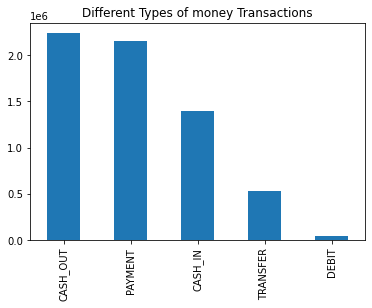

In [8]:
df['type'].value_counts().plot.bar()
plt.title('Different Types of money Transactions')

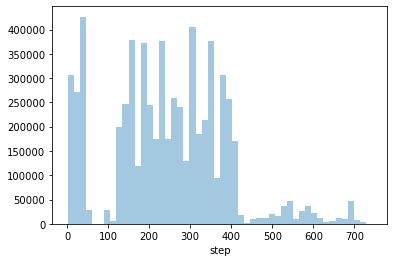

In [9]:
sns.distplot(df['step'],kde=False,bins=50)


Text(0.5, 1.0, 'Most common Transaction amounts')

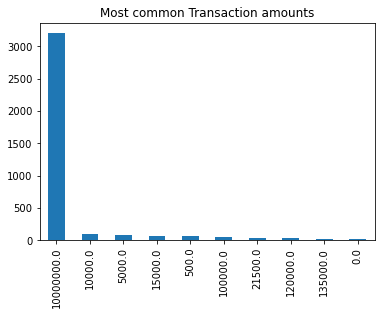

In [10]:
df['amount'].value_counts().head(10).plot.bar()
plt.title('Most common Transaction amounts')

In [11]:
# no.of Fraud.
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

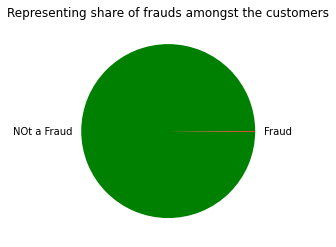

In [12]:
plt.pie(df['isFraud'].value_counts(), labels=['NOt a Fraud','Fraud'],colors=['g','r'])
plt.title('Representing share of frauds amongst the customers')
plt.show()

In [13]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

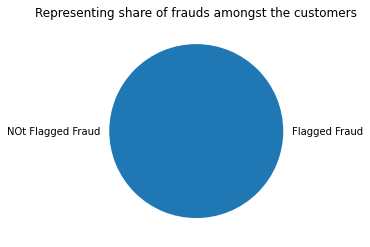

In [14]:
plt.pie(df['isFlaggedFraud'].value_counts(), labels=['NOt Flagged Fraud','Flagged Fraud'])
plt.title('Representing share of frauds amongst the customers')
plt.show()

In [15]:
#fraud transaction types and their counts
df.loc[df.isFraud==1].type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [16]:
#transaction Flagged to be fraud
df.loc[df.isFlaggedFraud==1].type.value_counts()

TRANSFER    16
Name: type, dtype: int64

# Feature Enggineering

In [17]:
df=df.loc[(df.type=='TRANSFER') | (df.type=='CASH_OUT')]

In [18]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [19]:
#removing unwanted Columns
df=df.drop(['nameOrig','nameDest'],axis=1)

In [20]:
#creating dummy for type variable
df=pd.get_dummies(df,columns=['type'],drop_first=True)

In [21]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,1


In [22]:
df['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

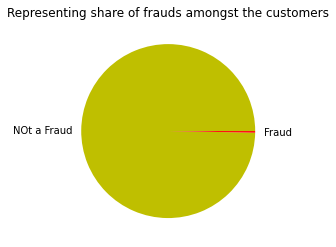

In [23]:
plt.pie(df['isFraud'].value_counts(), labels=['NOt a Fraud','Fraud'], colors=['y','r'])
plt.title('Representing share of frauds amongst the customers')
plt.show()

In [24]:
#independent and dependent set
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']
print(x.shape)
print(y.shape)

(2770409, 8)
(2770409,)


# Up Sampling

In [25]:
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(x, y.values.ravel())
print(x_res.shape)
print(y_res.shape)

(5524392, 8)
(5524392,)


# Train_Test_Split

In [26]:
#spliting dataset into train-test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2,random_state=0)

# Feature Scaling

In [27]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
std_sc= StandardScaler()
x_train= std_sc.fit_transform(x_train)
x_test= std_sc.fit_transform(x_test)

# Model Building

In [28]:
#LogisticRegresstion
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(x_train, y_train)
pred_1= model_1.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    553120
           1       0.93      0.96      0.95    551759

    accuracy                           0.94   1104879
   macro avg       0.94      0.94      0.94   1104879
weighted avg       0.94      0.94      0.94   1104879

